# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.

### 1

To show the relation between the periodogram and the discrete Fourier transform (DFT) for a given $m \geq n$, we'll start by expressing $I_n\left(\frac{2\pi k}{m}\right)$ in terms of the DFT of the observations.

Recall the expression for $I_n(\lambda)$:

$$
I_n(\lambda) = \frac{1}{2\pi n} \left|\sum_{k=0}^{n-1} X_k e^{i\lambda k}\right|^2
$$

Now, we want to evaluate $I_n\left(\frac{2\pi k}{m}\right)$:
$$
I_n\left(\frac{2\pi k}{m}\right) = \frac{1}{2\pi n} \left|\sum_{h=0}^{n-1} X_h e^{i\frac{2\pi k}{m}h}\right|^2
$$

To relate this expression to the DFT, we need to rewrite the exponent in the DFT form. Notice that $e^{i\frac{2\pi k}{m}h}$ can be expressed as $e^{-2i\pi\frac{kh}{m}}$. Therefore, we can rewrite $I_n\left(\frac{2\pi k}{m}\right)$ as follows:
$$
I_n\left(\frac{2\pi k}{m}\right) = \frac{1}{2\pi n} \left|\sum_{h=0}^{n-1} X_h e^{-2i\pi\frac{kh}{m}}\right|^2
$$

Now, let's define the DFT of $X$ with length $m$ at frequency index $k$:
$$
DFT(X, m)(k) = \sum_{h=0}^{n-1} X_h e^{-2i\pi\frac{kh}{m}}
$$

Using this definition, we can rewrite the expression for $I_n\left(\frac{2\pi k}{m}\right)$ in terms of the DFT:
$$
I_n\left(\frac{2\pi k}{m}\right) = \frac{1}{2\pi n} |DFT(X, m)(k)|^2
$$


### 2 : Provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session

In [2]:
import numpy as np

def periodogram_def(X, m, n):
    ''' Compute the periodogram of the observations X.
    Parameters
    ----------
    X : Observations
    m : int
        Number of frequencies to compute (Length of the transformed axis of the output.)
    n : int
        Number of observations.
    Returns
    -------
    I_values : numpy.ndarray, shape=(m,)
        Periodogram values.
    '''
    # Compute the DFT if the observations
    DFT_X = np.fft.fft(X, m)
    
    # Compute the periodogram
    I_values = (1 / (2 * np.pi * n)) * np.abs(DFT_X) ** 2

    # I_n(2πk/m) is I_values[k]
    return I_values

Lets try this function on the first time series $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$

In [3]:
sigma = 1 # standard deviation
mean_wn = 0 # mean of white noise
T = 100 # time

Z = np.random.normal(mean_wn, sigma, T)

In [4]:
a = 2
b = 2

X = np.zeros(T)
for i in range(1, T):
    X[i] = a + b * Z[i] + Z[i-1]

In [5]:
# Parameters :
m = 2*T
k = 5

periodogram = periodogram_def(X, m, n=T)
# I_n(2πk/m) is periodogram[k]
print(periodogram[k])

0.5340864880003331


### 4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

We should just choose $ m = \tilde{m} > n$, to have :$$ I_n(\frac{2\pi k}{\tilde{m}}) = DFT(\hat{\gamma}_n, \tilde{m})(k)$$

From the relation above we can write that : $$ \frac 1 n IDFT(I_n(\frac{2\pi k}{\tilde{m}}))(k) = \hat{\gamma}_n(k)$$

and we know that for $m > n$ : 
$$
I_n\left(\frac{2\pi k}{m}\right) = \frac{1}{2\pi n} |DFT(X, m)(k)|^2
$$ 

So : 
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\frac{1}{2\pi n} \left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$

Finally : 
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$

### 5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.

We have : 
$$
Var(\hat{\gamma}_n(k)) = \frac{1}{(2\pi n)^2} Var[ \left|DFT(X, \tilde{m})\right|^2)(k)]

$$

In [11]:
# Let's consider the white noise Z, defined above :
sigma = 1 # standard deviation
mean_wn = 0 # mean of white noise
n = [10, 500, 1000, 100_0000]

Z = [np.random.normal(mean_wn, sigma, n[3])]

# estimation of the variance of the periodogram
variance = []
for i in range(4):
    # Compute the periodogram
    m = 2 * n[i] 
    DFT_X = np.fft.fft(Z[:n[i]], m)
    periodogram = (1 / (2 * np.pi * n[i])) * np.abs(DFT_X) ** 2

    # Calculate and store the variance of the periodogram
    variance.append(np.var(periodogram))

print(variance)

[0.12984218118968782, 0.09008404854836338, 0.10373230139898217, 0.025363127677860035]


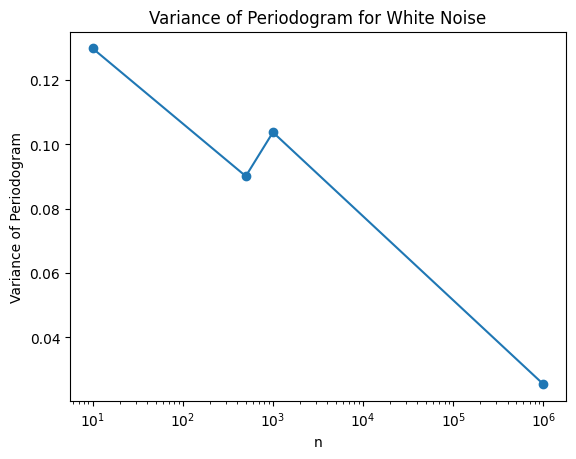

In [12]:
import matplotlib.pyplot as plt

plt.plot(n, variance, marker='o')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('Variance of Periodogram')
plt.title('Variance of Periodogram for White Noise')
plt.show()

    As expected, the variances decrease as n increases. This aligns with the notion that larger sample sizes lead to more accurate spectral density estimates.